In [1]:
# Assignment 3
# Multiple Linear Regression on house dataset
# Abhay Charan Patro 
# BTECH/10021/18
# CSE B

In [2]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn import linear_model
from sklearn import metrics

In [3]:
# Reading the data
data=pd.read_csv("House.csv")
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
# Describing the data
data.describe()

,size(in square feet),number of bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
# First few entries of the data
data.head()

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
# Checking for empty data fields
flag=data.isnull().values.any()
if(flag):
  print("The data set contains empty field")
else:
  print("The data set does'nt contain any empty field")

The data set does'nt contain any empty field


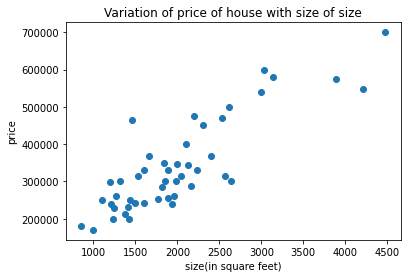

In [7]:
# Plotting the data
plt.scatter(data['size(in square feet)'],data['price'])
plt.ylabel("price")
plt.xlabel("size(in square feet)")
plt.title("Variation of price of house with size of size")
plt.show()

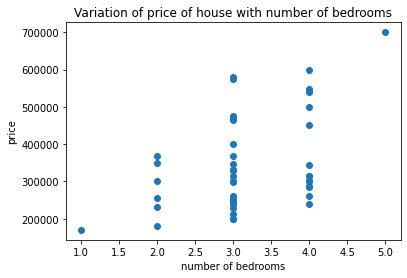

In [8]:
# Plotting the data
plt.scatter(data['number of bedrooms'],data['price'])
plt.ylabel("price")
plt.xlabel("number of bedrooms")
plt.title("Variation of price of house with number of bedrooms")
plt.show()

In [9]:
# Splitting the data into train and test set
X=data.iloc[:,0:2]
y=data.iloc[:,2]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [10]:
# Mean Normalizing the data 
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.reshape(y_train.shape[0],1);

**METHOD 1 - Using Sci-kit Learn Library**

In [11]:
# Fitting the model to X_train and y_train
cf = linear_model.LinearRegression()
cf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Making Predictions on the test set
y_pred=cf.predict(X_test)

In [13]:
# Printing different errors 
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :   68915.53254571013
Mean Squared Error :   5782243058.833695
Root Mean Squared Error :   76041.06166298375


In [14]:
# Printing the R-squared metric
r2_sklearn=metrics.r2_score(y_test,y_pred)
print("The R-squared metric using sk-learn is ",r2_sklearn)

The R-squared metric using sk-learn is  0.6745515249932021


**METHOD 2 - Writting the algorithm manually**

In [15]:
# Cost function
def computecost(X,y,params):
  H=np.matmul(X,params)
  H=H-y
  H=np.matmul(np.transpose(H),H)
  J=H/(2*X.shape[0])
  return J

In [16]:
# Defining the gradient descent function
def Gradientdescent(alpha,iteration,X,y):
  # To return parameters m and b
  prev_error=0
  size=X.shape[0]
  params=np.random.rand(X.shape[1]+1,1)
  a=np.ones(size)
  a=a.reshape(size,1)
  X=np.concatenate((a,X),axis=1)
  Jhist=computecost(X,y,params)
  iter=[]
  cost=[]
  for i in range(0,iteration):
    cost.append(Jhist[0])
    iter.append(i+1)
    gama=np.matmul(X,params) 
    gama=gama-y  
    gama=(np.matmul(np.transpose(gama),X))/size
    params=params-alpha*np.transpose(gama)
    Jnew=computecost(X,y,params)
    Jhist=Jnew
  cost=np.array(cost)
  iter=np.array(iter)
  return cost,iter,params

In [17]:
# Defining the prediction function
def predictor(params,X):
  size=X.shape[0]
  a=np.ones(size)
  a=a.reshape(size,1)
  X=np.concatenate((a,X),axis=1)
  return np.matmul(X,params)

In [18]:
# Running Gradient Descent
cost,iter,params=Gradientdescent(0.03,4000,X_train,y_train)

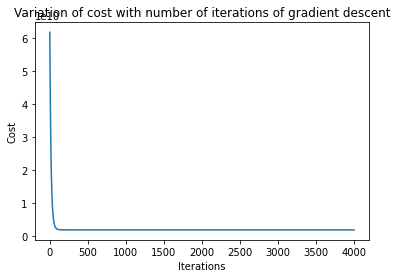

In [19]:
# Plotting the variation of cost with number of iterations of gradient descent
plt.plot(iter,cost)
plt.title("Variation of cost with number of iterations of gradient descent")
plt.xlabel("Iterations")
plt.ylabel('Cost')
plt.show()

In [20]:
# Predicting the values of the test set
y_pred_manual=predictor(params,X_test)

In [21]:
# Printing different errors 
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred_manual))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_pred_manual))
print('Root Mean Squared Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_manual)))

Mean Absolute Error :   68915.53254571042
Mean Squared Error :   5782243058.83374
Root Mean Squared Error :   76041.06166298404


In [22]:
# Finding the r2_metric for our manually written algo
r2_manual=metrics.r2_score(y_test,y_pred_manual)
print("The R-squared metric using our own manual algo is ",r2_manual)

The R-squared metric using our own manual algo is  0.6745515249931996


**Comparing Scikit-Learn's model with our model**



In [23]:
print("The parameters learnt using our manual algo are ",params[0][0],", ",params[1][0],", ",params[2][0])
print("The parameters learnt using sklearn library are ",cf.intercept_[0],", ",cf.coef_[0][0],", ",cf.coef_[0][1])

The parameters learnt using our manual algo are  330835.0810810802 ,  102924.08617129836 ,  -1103.7568649440339
The parameters learnt using sklearn library are  330835.08108108107 ,  102924.08617129867 ,  -1103.756864944225


In [24]:
print("The R-squared metric using our own manual algo is ",r2_manual)
print("The R-squared metric using sk-learn is ",r2_sklearn)

The R-squared metric using our own manual algo is  0.6745515249931996
The R-squared metric using sk-learn is  0.6745515249932021


Hence we can see that our model is giving almost same results to that of Scikit-Learn's Model